In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('total_out_clean.csv')
data = data.drop(columns='Unnamed: 0')
data.reset_index(drop=True, inplace=True)
data.head()

,price,old_price,Type,pays,region,voyageurs,rooms,bed,bathroom,period_start,period_end,new_rating
0,2920.0,6084.0,cottage,Espagne,Madrid,9,3,8,2,2024-07-31,2024-08-31,4.97
1,1500.0,1705.0,hébergement,Espagne,Trevélez,2,1,1,1,2024-07-31,2024-08-31,4.89
2,1968.0,3280.0,loft,Espagne,Madrid,2,1,1,1,2024-07-31,2024-08-31,4.81
3,2353.0,2870.0,loft,Espagne,Séville,4,2,3,1,2024-07-31,2024-08-31,4.96
4,2129.0,2505.0,appartement,Espagne,Madrid,2,1,1,1,2024-07-31,2024-08-31,4.83


In [40]:
%matplotlib inline
plt.style.use('bmh')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         753 non-null    float64
 1   old_price     753 non-null    float64
 2   Type          753 non-null    object 
 3   pays          753 non-null    object 
 4   region        753 non-null    object 
 5   voyageurs     753 non-null    int64  
 6   rooms         753 non-null    int64  
 7   bed           753 non-null    int64  
 8   bathroom      753 non-null    int64  
 9   period_start  753 non-null    object 
 10  period_end    753 non-null    object 
 11  new_rating    753 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 70.7+ KB


count      753.000000
mean      1787.543161
std       1014.745970
min        338.000000
25%       1172.000000
50%       1530.000000
75%       2158.000000
max      15336.000000
Name: price, dtype: float64


/var/folders/_y/9bzh_k0d3h15227_glcddy0m0000gn/T/ipykernel_26616/345734477.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'], color='g', bins=100, hist_kws={'alpha': 0.4});


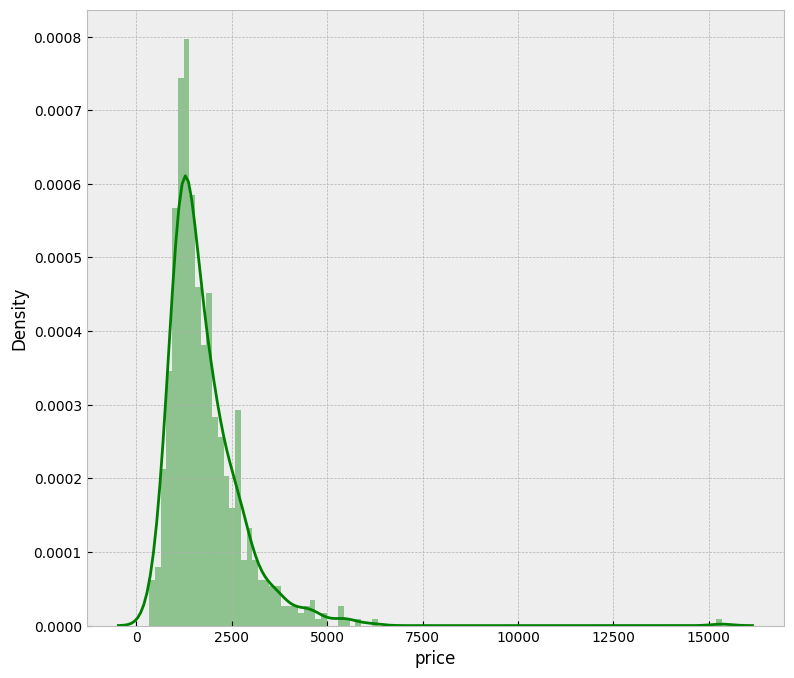

In [42]:
print(data['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['price'], color='g', bins=100, hist_kws={'alpha': 0.4});

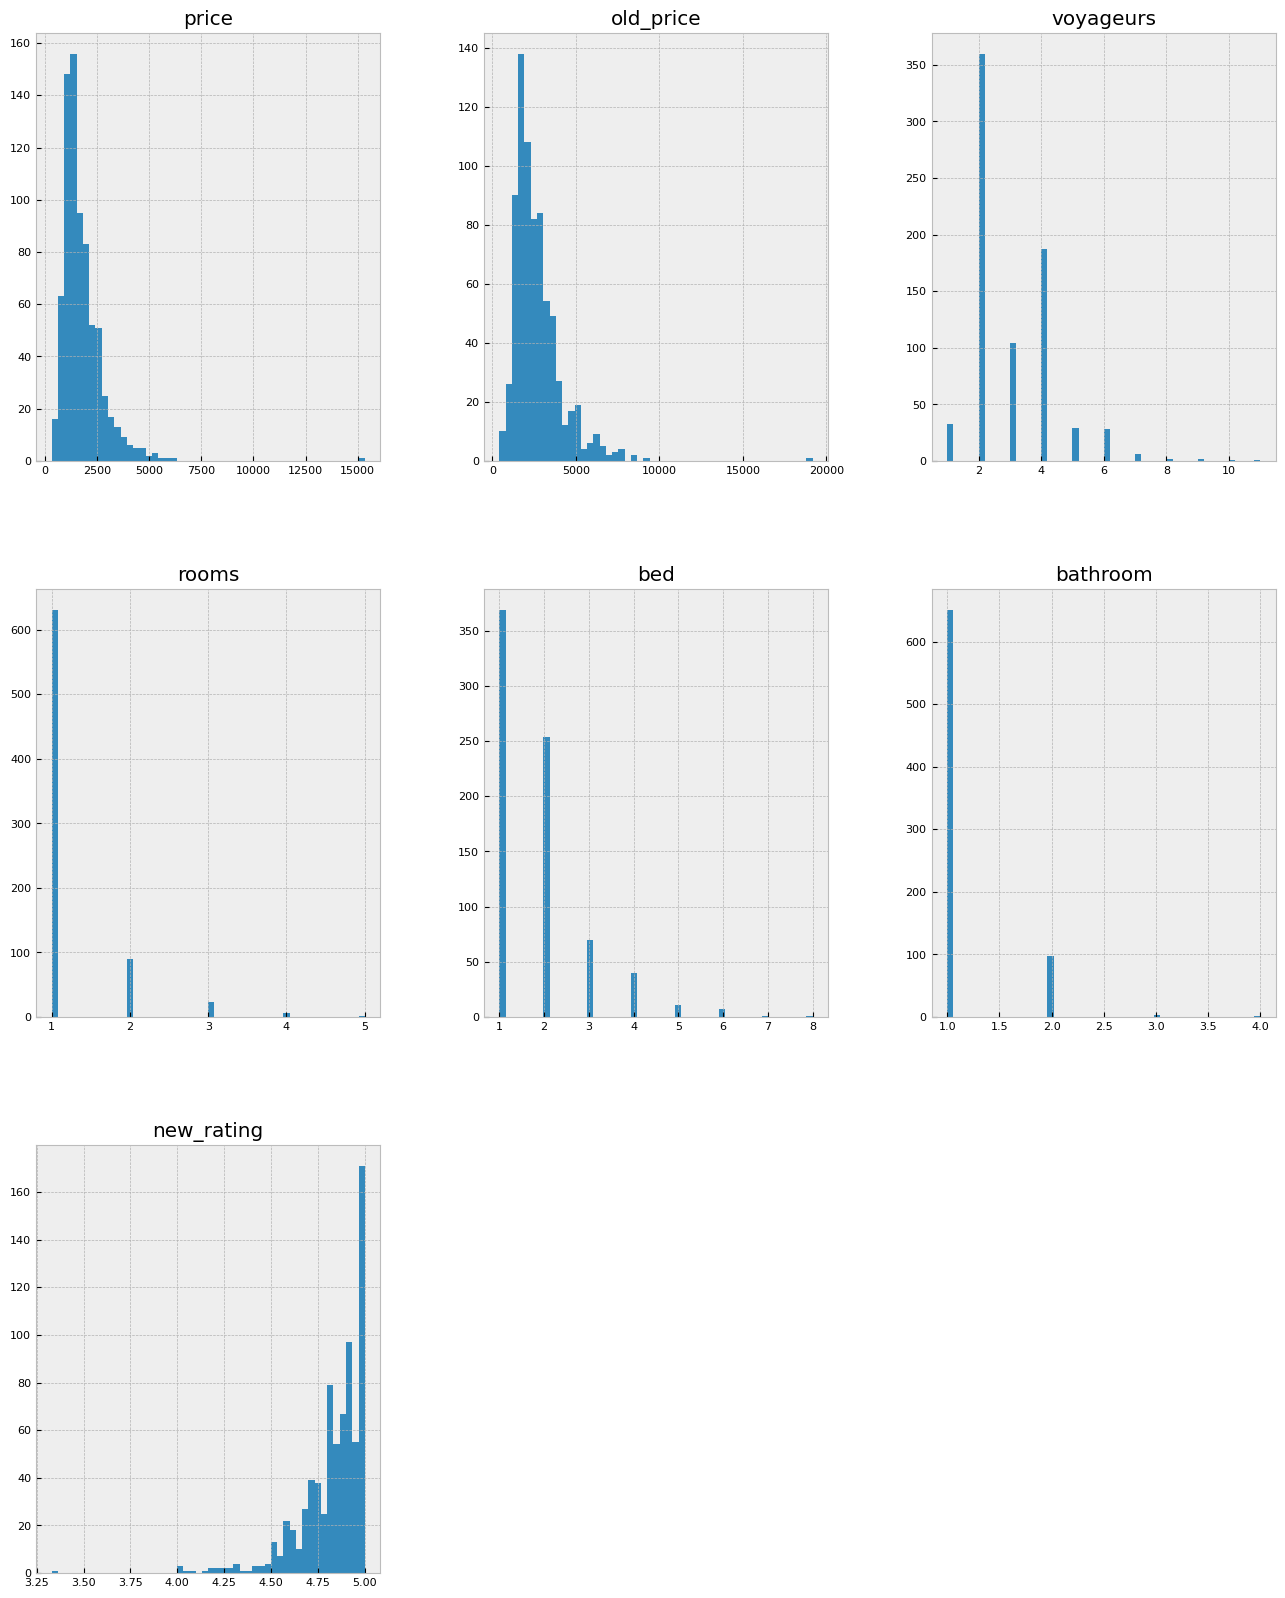

In [43]:

#data = data.select_dtypes(include = ['float64', 'int64'])
#df_num.head()
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

In [44]:

df_num_corr = data.corr()['price'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 strongly correlated values with SalePrice:
price        1.000000
old_price    0.893243
voyageurs    0.267646
rooms        0.204294
bed          0.197814
bathroom     0.170338
Name: price, dtype: float64


/var/folders/_y/9bzh_k0d3h15227_glcddy0m0000gn/T/ipykernel_26616/3015535391.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_num_corr = data.corr()['price'][:-1] # -1 because the latest row is SalePrice


/var/folders/_y/9bzh_k0d3h15227_glcddy0m0000gn/T/ipykernel_26616/2987457854.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr() # We already examined SalePrice correlations


<AxesSubplot: >

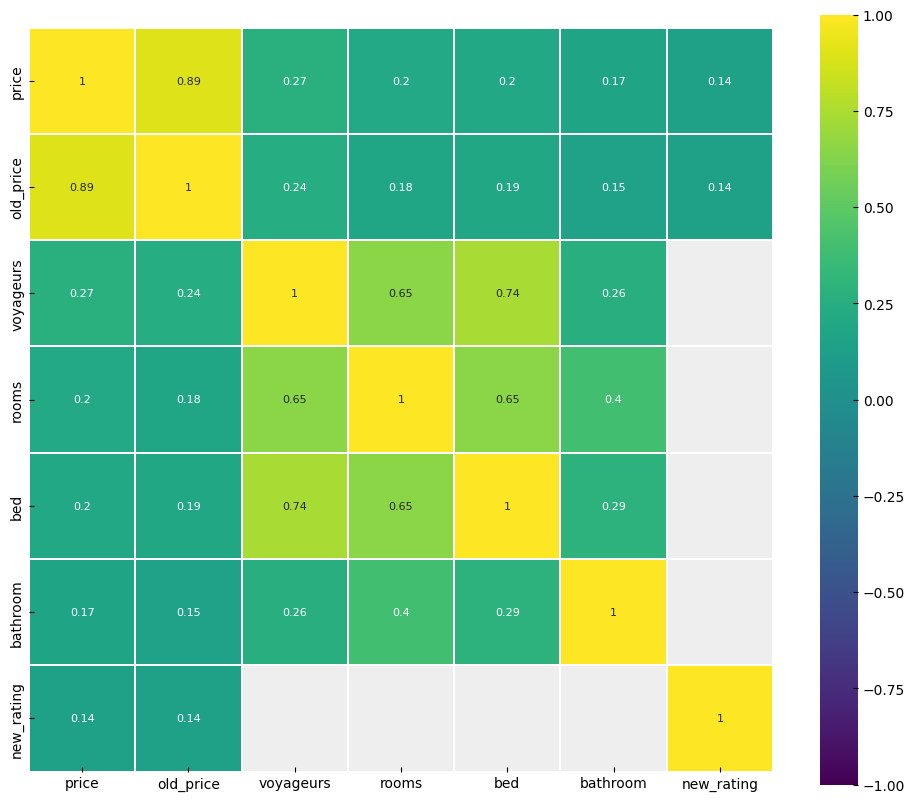

In [54]:
corr = data.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)